In [2]:
import pandas as pd
df=pd.read_csv("haberman.csv")
df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1


In [3]:
df.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
df['status'].value_counts()

1    225
2     80
Name: status, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

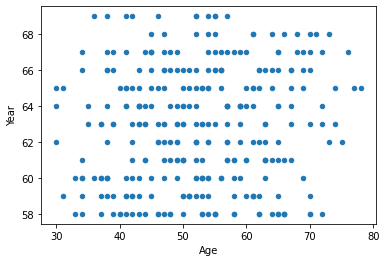

In [8]:
df.plot(kind="scatter",x="age",y="year")
plt.xlabel("Age")
plt.ylabel("Year")
plt.show()

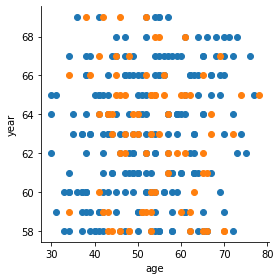

In [9]:
sns.FacetGrid(df,hue="status",height=4).map(plt.scatter,"age","year")

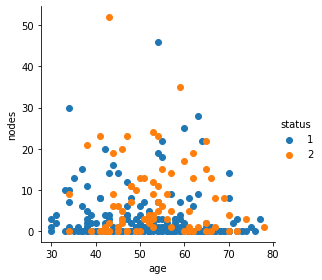

In [10]:
sns.FacetGrid(df,hue="status",height=4).map(plt.scatter,"age","nodes").add_legend()

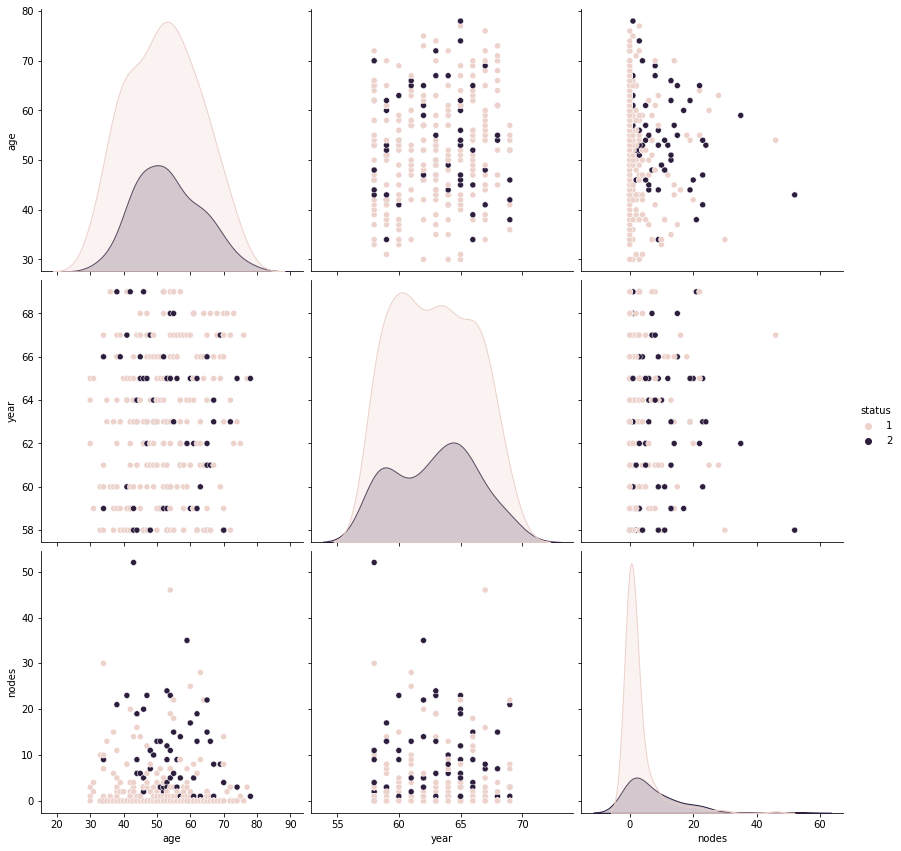

In [11]:
sns.pairplot(df,hue="status",height=4)

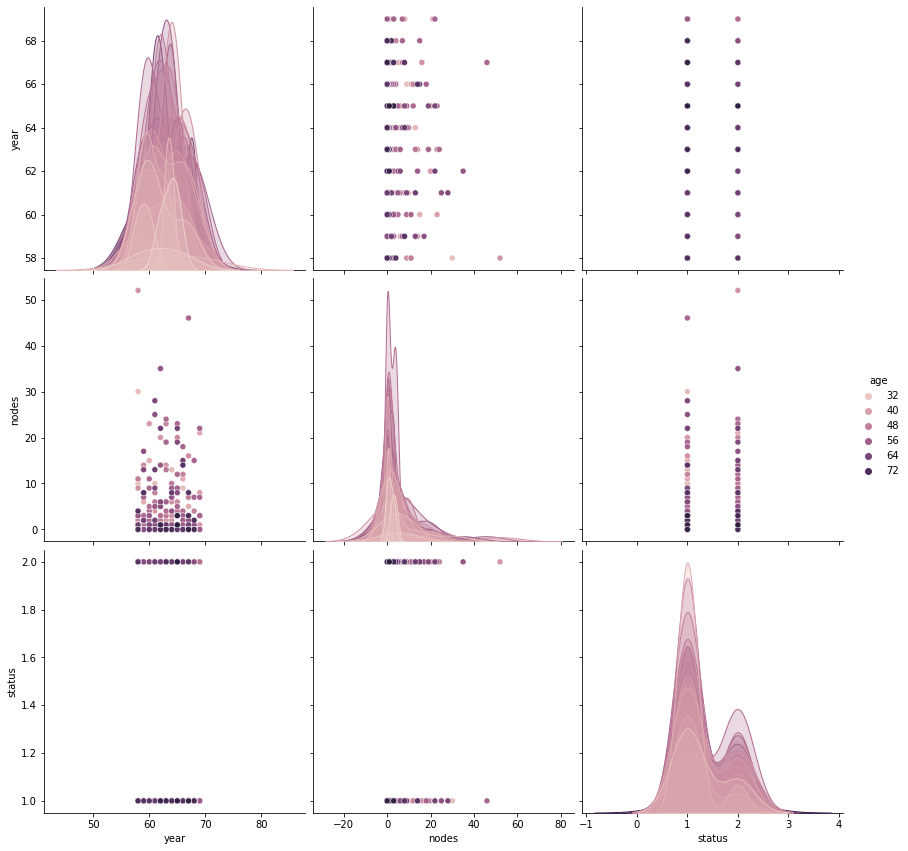

In [12]:
sns.pairplot(df,hue="age",height=4)

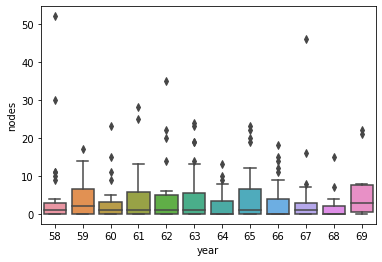

In [13]:
sns.boxplot(x="year",y="nodes",data=df)

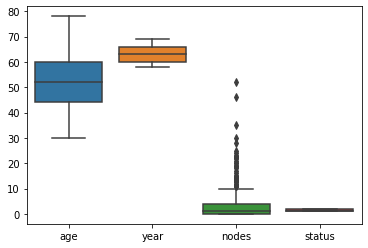

In [14]:
sns.boxplot(data=df)

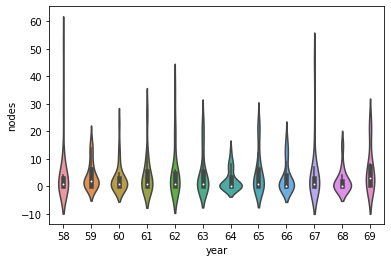

In [15]:
sns.violinplot(x="year",y="nodes",data=df)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#here we will see use KNN algorithm
#accuracy_score() will claculate accuracy of algorithm's pediction
#train_test_split will split data in training and testing set

In [17]:
y=df['status']
x=df[['age','year','nodes']]
x.shape,y.shape

((305, 3), (305,))

In [18]:
#Split data in training dataset and testing dataset for module training and testing. For validation we can use new dataset
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((228, 3), (77, 3), (228,), (77,))

In [19]:
min=1
bestK=0
#find best value of k comparing knn classiffier results for different values of k 
for i in  range (1,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    
    y_pred_train=neigh.predict(X_train)
    accuracy_train=accuracy_score(y_train, y_pred_train)
    
    y_pred_test=neigh.predict(X_test)
    accuracy_test=accuracy_score(y_test, y_pred_test)

    if(accuracy_train-accuracy_test)<min:
      min=accuracy_train-accuracy_test
      bestK=i
#to check accuracy for all values of k, uncomment below code
#     print(" "*20,'K value',i)
#     print('*'*50)
#     print('Accuracy for train data ',accuracy_train)
#     print('Accuracy for test data',accuracy_test)
#     print('*'*50)
#     print(' '*50)
print(' '*10,"Best value for K is :",bestK)
print(f'For k={bestK}, accuracy is :')
neigh = KNeighborsClassifier(n_neighbors=bestK)
neigh.fit(X_train, y_train)
y_pred_train=neigh.predict(X_train)
accuracy_train=accuracy_score(y_train, y_pred_train)
y_pred_test=neigh.predict(X_test)
accuracy_test=accuracy_score(y_test, y_pred_test)
print('Accuracy for train data ',accuracy_train)
print('Accuracy for test data',accuracy_test)

           Best value for K is : 43
For k=43, accuracy is :
Accuracy for train data  0.7631578947368421
Accuracy for test data 0.7272727272727273
